In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('atp_matches_2019.csv')
ranking = pd.read_csv('atp_rankings_10s.csv')
players = pd.read_csv('atp_players.csv', names = ['id', 'first_name', 'last_name', 'hand', 'date_of_birth', 'country'])

In [3]:
import sys
sys.executable
sys.path.append('/home/upflo/Desktop/asm/asm_env/lib/python3.6/site-packages')
import networkx as nx

In [4]:
# player_ids = set(rank2019['player'])
# players_subset = players.loc[players['id'].isin(player_ids)]
# players_names = players_subset['last_name']
# g.add_nodes_from(players_names)

In [5]:
def last_name(id):
    temp = players[players.id == id]['last_name'].tolist()
    return temp[0]

In [6]:
# subset = df[df.tourney_date >20190000]
win_los = df[['winner_id', 'loser_id']]
temp = [tuple(x) for x in win_los.to_numpy()]
edges = [(last_name(id1), last_name(id2))for id1, id2 in temp]
from collections import Counter
c = Counter(edges)
g = nx.DiGraph((x,y,{'weight': z}) for (x,y),z in c.items())

In [7]:
edge_labels=dict([((u,v),d['weight'])
                 for u,v,d in g.edges(data=True)])

In [8]:
import matplotlib.pyplot as plt

Čvorovi ego mreže igrača Novak su ['Isner', 'Wawrinka', 'Edmund', 'Hurkacz', 'Ruud', 'De Minaur', 'Shapovalov', 'Tsonga', 'Fritz', 'Monfils', 'Verdasco', 'Gasquet', 'Federer', 'Otte', 'Nagal', 'Herbert', 'Harris', 'Tsitsipas', 'Albot', 'Istomin', 'Sonego', 'Goffin', 'Djokovic', 'Evans', 'Berrettini', 'Gojowczyk', 'Bautista Agut', 'Coric', 'Medvedev', 'Pouille', 'Londero', 'Ramos', 'Millman', 'Clarke', 'Kohlschreiber', 'Nadal', 'Dzumhur', 'Anderson', 'Krajinovic', 'Sousa', 'Nishikori', 'Mayer', 'Fucsovics']


{('Isner', 'Millman'): Text(0.27443468316687375, -0.6995329803075266, '1'),
 ('Isner',
  'Bautista Agut'): Text(-0.2540476016545769, -0.4278215296571034, '1'),
 ('Isner', 'Edmund'): Text(0.9703204155148251, 0.20166938788221275, '1'),
 ('Isner', 'Ramos'): Text(0.17285432716701785, -0.6883559888515973, '1'),
 ('Isner', 'Sonego'): Text(-0.3832530788139226, 0.15220119545405958, '1'),
 ('Isner', 'Ruud'): Text(0.8837984503020215, 0.3862374472147102, '1'),
 ('Isner', 'Hurkacz'): Text(0.9338137805863265, 0.297119690782816, '1'),
 ('Isner', 'Evans'): Text(-0.3832531205371739, -0.15220113189887446, '1'),
 ('Isner', 'Monfils'): Text(0.47705336840872037, 0.6772386000304833, '1'),
 ('Isner', 'Pouille'): Text(-0.02006976244577069, -0.6225394374445966, '1'),
 ('Isner', 'De Minaur'): Text(0.8213405371795746, 0.4671231853000418, '1'),
 ('Wawrinka', 'Nishikori'): Text(0.9306167006913383, -0.253439443664662, '2'),
 ('Wawrinka', 'Shapovalov'): Text(0.74457409993403, 0.5817333550584755, '1'),
 ('Wawrinka',

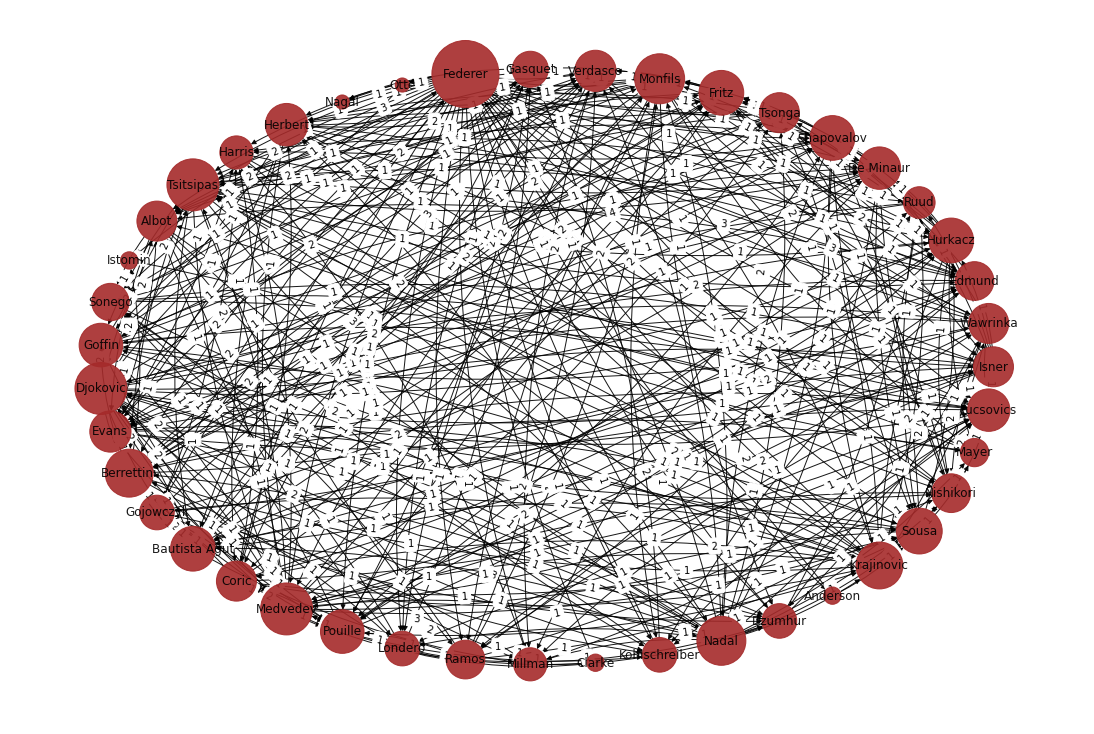

In [9]:
ego_mreza = nx.ego_graph(g, 'Federer')
plt.figure(figsize=(15,10))
pos = nx.circular_layout(ego_mreza)
# pos = nx.spring_layout(ego_mreza)
# print(pos)
edge_labels=dict([((u,v),d['weight'])
                 for u,v,d in ego_mreza.edges(data=True)])
d = dict(ego_mreza.degree)
nx.draw(ego_mreza,
        pos,edge_color='black',width=1,linewidths=1,\
node_color='brown',alpha=0.9,\
labels={node:node for node in ego_mreza.nodes()},connectionstyle='arc3, rad = 0.1',nodelist=list(d), node_size=[v * 100 for v in d.values()])
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels=edge_labels, label_pos=0.3)


In [10]:
#print(*g.edges(data=True), sep='\n')

In [11]:
nx.write_gml(g,'gephi.gml')

In [12]:
novak_ego = nx.ego_graph(g, 'Djokovic')
nx.write_gml(novak_ego,'novak_ego.gml')

In [13]:
r1 = nx.degree_assortativity_coefficient(g)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(g, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.15403609897284273
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.16321470709706437


In [14]:
def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(5)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 98, 2: 54, 3: 19, 4: 18, 7: 10, 32: 6, 8: 6, 45: 6, 36: 6, 17: 6, 9: 6, 5: 6, 48: 5, 43: 5, 12: 5, 41: 4, 18: 4, 28: 4, 15: 4, 11: 4, 39: 3, 49: 3, 37: 3, 30: 3, 10: 3, 54: 3, 55: 3, 47: 3, 38: 3, 52: 3, 56: 3, 23: 3, 19: 3, 20: 3, 40: 3, 31: 2, 22: 2, 16: 2, 29: 2, 14: 2, 50: 2, 61: 2, 13: 2, 6: 2, 69: 1, 57: 1, 35: 1, 33: 1, 21: 1, 58: 1, 25: 1, 42: 1, 59: 1, 70: 1, 44: 1, 53: 1, 26: 1, 27: 1})


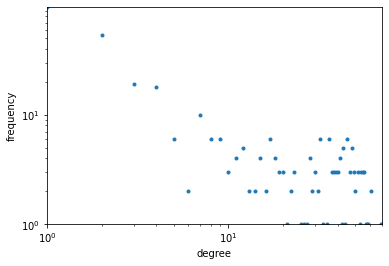

In [15]:
plot_deg_frequency(g)

Counter({1: 97, 2: 55, 3: 19, 4: 18, 7: 10, 43: 6, 9: 6, 5: 6, 8: 5, 18: 5, 39: 5, 16: 5, 12: 5, 57: 4, 48: 4, 49: 4, 10: 4, 46: 4, 17: 4, 52: 3, 36: 3, 31: 3, 42: 3, 33: 3, 64: 3, 40: 3, 30: 3, 22: 3, 53: 3, 21: 3, 28: 3, 23: 3, 20: 3, 14: 3, 66: 3, 55: 2, 34: 2, 35: 2, 54: 2, 68: 2, 11: 2, 15: 2, 50: 2, 13: 2, 6: 2, 80: 1, 44: 1, 37: 1, 38: 1, 60: 1, 65: 1, 69: 1, 62: 1, 59: 1, 67: 1, 26: 1, 63: 1, 19: 1, 79: 1, 41: 1, 82: 1, 58: 1, 56: 1, 29: 1})


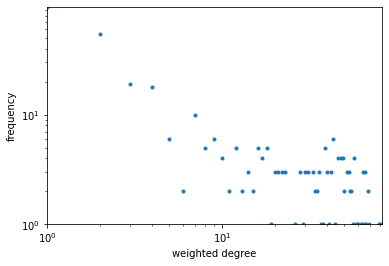

In [16]:
plot_deg_frequency(g, True)

In [46]:
def get_id(player_lname):
    return int(players[players.last_name == player_lname]['id'])
players[players.last_name == 'Medvedev']

,id,first_name,last_name,hand,date_of_birth,country
2445,102446,Andrei,Medvedev,R,19740831.0,UKR
6406,106421,Daniil,Medvedev,R,19960211.0,RUS
32802,132818,Edvard,Medvedev,U,19970202.0,RUS


In [35]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [41]:
plid = 111790
columns_to_display = ['tourney_id', 'match_num', 'winner_id', 'loser_id']
to_print = df[(df['winner_id'] == plid) | (df['loser_id'] == plid)][columns_to_display]
with pd.option_context('display.max_rows', None):  # more options can be specified also
    print(to_print)
    #     with open('somefile.txt', 'a') as the_file:
#         the_file.write(print(to_print))
    
# df[(df['winner_id'] == 135152) | (df['loser_id'] == 135152)]

     tourney_id  match_num  winner_id  loser_id
374   2019-0424        300     124187    111790
376   2019-0424        298     111790    105023
379   2019-0424        295     111790    103893
386   2019-0424        288     111790    105449
397   2019-0424        275     111790    200368
459   2019-0499        273     105173    111790
1559   2019-540        157     104571    111790
1672  2019-0315        283     105051    111790
1894  2019-M035        239     104542    111790
1931  2019-0421        263     126205    111790
2103   2019-560        151     105332    111790
2478  2019-0429        278     105649    111790


## Istrazivacka pitanja

1.Koliki je prosečan broj tenisera (saigrača) po svakom teniseru?

In [61]:
pid = get_id('Tsonga')
# pid = 104925
winner_ops = set(df[(df['loser_id'] == pid)]['winner_id'])
loser_ops = set(df[(df['winner_id'] == pid)]['loser_id'])
print(len(winner_ops))
print(len(loser_ops))
num_of_diff_ops = len(winner_ops.union(loser_ops))
print(num_of_diff_ops)

17
31
42


In [60]:
len(list(g.neighbors('Tsonga')))

31